In [2]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import librosa
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import os
import numpy as np
import pandas as pd

In [3]:
features_file = '../data/gender/voice.csv'
voice_df = pd.read_csv(features_file)
print 'Columns: ', list(voice_df.columns)

Columns:  ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


In [4]:
features = list(voice_df.columns[:-1])
print 'Voice Features: ', features

Voice Features:  ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [5]:
print 'No. of training samples for class "male":', voice_df[voice_df['label'] == 'male'].shape[0]

No. of training samples for class "male": 1584


In [6]:
voice_df[voice_df['label'] == 'male'].head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
print 'No. of training samples for class "female":', voice_df[voice_df['label'] == 'female'].shape[0]

No. of training samples for class "female": 1584


In [8]:
voice_df[voice_df['label'] == 'female'].head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.158108,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,0.679223,...,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,female
1585,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,...,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,female
1586,0.199807,0.061974,0.211358,0.184422,0.235687,0.051265,2.543841,14.921964,0.904432,0.425289,...,0.199807,0.156465,0.016194,0.266667,0.250446,0.054688,0.898438,0.843750,0.329521,female
1587,0.195280,0.072087,0.204656,0.180611,0.255954,0.075344,2.392326,10.061489,0.907115,0.524209,...,0.195280,0.182629,0.024922,0.275862,0.269531,0.054688,0.703125,0.648438,0.294717,female
1588,0.208504,0.057550,0.220229,0.190343,0.249759,0.059416,1.707786,5.670912,0.879674,0.343548,...,0.208504,0.162043,0.016807,0.262295,0.260789,0.054688,0.812500,0.757812,0.251546,female


In [122]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(voice_df[features]), columns = voice_df[features].columns)
pca = PCA(n_components=5)
pca_results = pca.fit_transform(data_scaled)

print 'Shape of the transformed feature vector:', pca_results.shape
print 'Original training sample:', list(voice_df[features].loc[0].values)
print 'Training sample after PCA:', list(pca_results[0])
print '\n'
# Percentage of variance explained for each components
print 'Explained variance ratio (first five components)'
print '------------------------------------------------'
for idx, r in enumerate(pca.explained_variance_ratio_):
    print 'Principal Component', idx, ':', r 

Shape of the transformed feature vector: (3168, 5)
Original training sample: [0.059780984959808103, 0.064241267703135901, 0.032026913372582004, 0.015071488645920899, 0.0901934398654331, 0.075121951219512206, 12.8634618371626, 274.40290550206697, 0.89336941670080705, 0.49191776639781104, 0.0, 0.059780984959808103, 0.084279106440321008, 0.0157016683022571, 0.27586206896551696, 0.0078125, 0.0078125, 0.0078125, 0.0, 0.0]
Training sample after PCA: [8.2085163104916408, 2.1644883625918574, 1.9597839267435693, 5.4524168658181935, 0.93085097538232764]


Explained variance ratio (first five components)
------------------------------------------------
Principal Component 0 : 0.452163907842
Principal Component 1 : 0.118706090432
Principal Component 2 : 0.109099393016
Principal Component 3 : 0.0761976317025
Principal Component 4 : 0.0529393770703


In [125]:
print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-3', 'PC-5']).transpose()

              PC-1      PC-2      PC-3      PC-3      PC-5
meanfreq -0.313361  0.034717  0.015924 -0.246570 -0.038612
sd        0.279772 -0.202719  0.090184 -0.214463  0.014912
median   -0.279302  0.007949  0.042971 -0.346672 -0.049277
Q25      -0.303399  0.155775 -0.065598 -0.052000  0.036864
Q75      -0.188523 -0.188194  0.116800 -0.559204 -0.089888
IQR       0.241049 -0.281229  0.139175 -0.249815 -0.091611
skew      0.130798  0.305776  0.505249 -0.011908 -0.083897
kurt      0.131871  0.248367  0.526860 -0.045228 -0.098408
sp.ent    0.222616 -0.356778 -0.204808 -0.128805 -0.043018
sfm       0.274429 -0.232113 -0.106867 -0.023960  0.034825
mode     -0.243130 -0.112073 -0.099279 -0.146386 -0.108420
centroid -0.313361  0.034717  0.015924 -0.246570 -0.038612
meanfun  -0.187707  0.128549 -0.012669  0.122884  0.536686
minfun   -0.158146 -0.063079 -0.029525  0.027492  0.292539
maxfun   -0.110543 -0.250008  0.259089  0.024257  0.539716
meandom  -0.226033 -0.269057  0.048765  0.243001 -0.1824

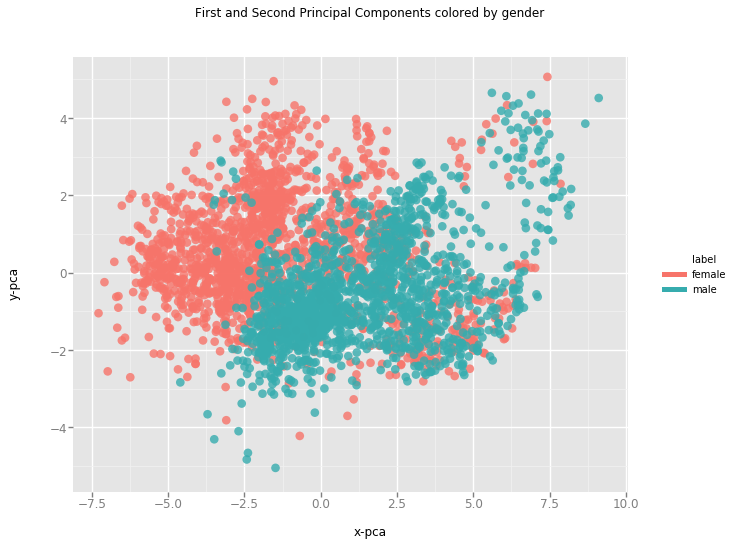

<ggplot: (8775117384881)>

In [126]:
from ggplot import *

df_pca = voice_df.copy()
df_pca['x-pca'] = pca_results[:,0]
df_pca['y-pca'] = pca_results[:,1]
chart = ggplot( df_pca, aes(x='x-pca', y='y-pca', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by gender")
chart

In [128]:
from collections import Counter

In [129]:
spectral = SpectralClustering(num_clusters).fit(voice_df[features])

In [131]:
labels = spectral.labels_
print labels
print Counter(labels)

[0 0 0 ..., 1 1 1]
Counter({0: 1892, 1: 1276})


In [132]:
from sklearn.manifold import TSNE

print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(voice_df[features])

Computing t-SNE embedding
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3168
[t-SNE] Computed conditional probabilities for sample 2000 / 3168
[t-SNE] Computed conditional probabilities for sample 3000 / 3168
[t-SNE] Computed conditional probabilities for sample 3168 / 3168
[t-SNE] Mean sigma: 0.626971
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.093733
[t-SNE] Error after 300 iterations: 1.093733


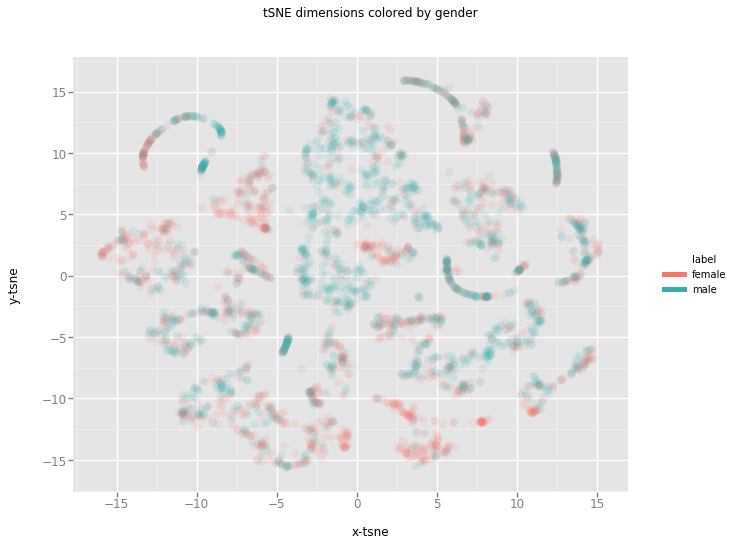

<ggplot: (8775113109957)>

In [133]:
df_tsne = voice_df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by gender")
chart

In [141]:
from sklearn.manifold import TSNE

print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_results)

Computing t-SNE embedding
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3168
[t-SNE] Computed conditional probabilities for sample 2000 / 3168
[t-SNE] Computed conditional probabilities for sample 3000 / 3168
[t-SNE] Computed conditional probabilities for sample 3168 / 3168
[t-SNE] Mean sigma: 0.583961
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.220931
[t-SNE] Error after 300 iterations: 1.220931


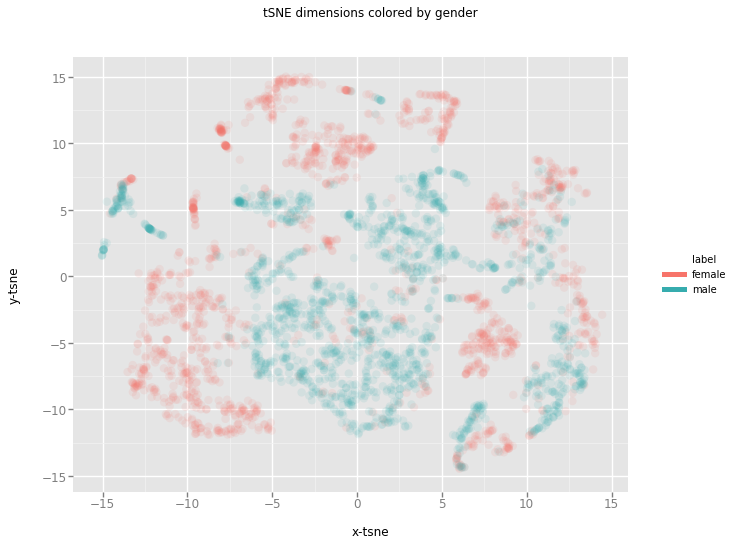

<ggplot: (8775112800721)>

In [142]:
df_tsne = voice_df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by gender")
chart

In [20]:
# Let's look at classifying this data.
# Let's create a baseline classifier using Logistic Regression.

# Divide the data into training and test datasets.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(voice_df[features], 
                                                    voice_df['label'], 
                                                    test_size=0.15, 
                                                    random_state=42)

In [21]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_train, y_train)

0.90936106983655274

In [23]:
model_lr.score(X_test, y_test)

0.92647058823529416